In [8]:
import pandas as pd
import seaborn as sns

In [2]:
bcd = pd.read_csv('./data/breast_cancer_data.csv')

In [3]:
def hit_reset():
    bcd = pd.read_csv('./data/breast_cancer_data.csv')
    bcd['patient_id'] = bcd['patient_id'].astype('string')
    bcd['doctor_name'] = bcd['doctor_name'].str.split().str[1]
    bcd['bare_nuclei'] = bcd['bare_nuclei'].replace('?', '')
    bcd['bare_nuclei'] = pd.to_numeric(bcd['bare_nuclei'])
    
    return bcd

In [5]:
bcd = hit_reset()

In [9]:
bcd.dtypes

patient_id                string
clump_thickness          float64
cell_size_uniformity     float64
cell_shape_uniformity      int64
marginal_adhesion          int64
single_ep_cell_size        int64
bare_nuclei              float64
bland_chromatin          float64
normal_nucleoli          float64
mitoses                    int64
class                     object
doctor_name               object
dtype: object

In [7]:
bcd['class'].value_counts()

benign       458
malignant    241
Name: class, dtype: int64

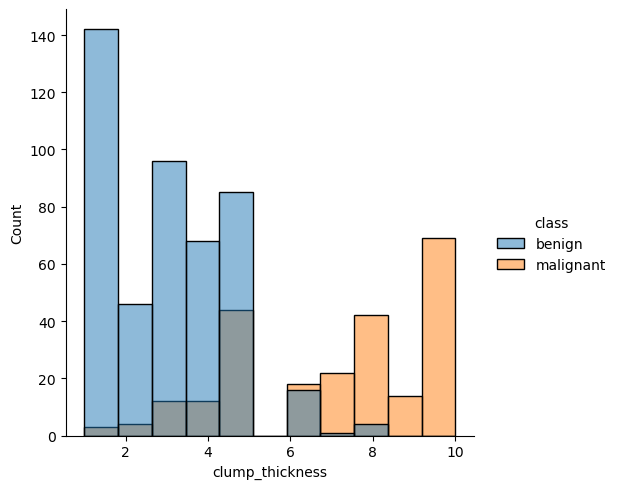

In [12]:
sns.displot(bcd, x = 'clump_thickness', hue = 'class')

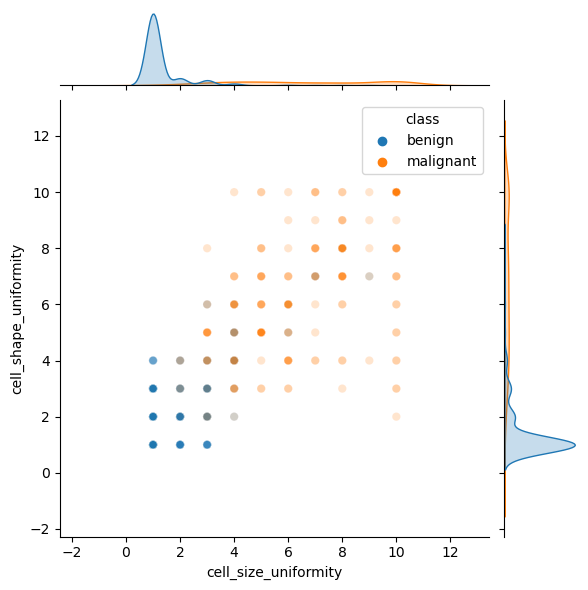

In [15]:
sns.jointplot(data=bcd, 
              x='cell_size_uniformity', 
              y='cell_shape_uniformity', 
              hue = 'class',
              alpha = 0.2)

### Get only numeric columns + 'class'

In [17]:
my_col_names = bcd.columns

In [18]:
my_col_names

Index(['patient_id', 'clump_thickness', 'cell_size_uniformity',
       'cell_shape_uniformity', 'marginal_adhesion', 'single_ep_cell_size',
       'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class',
       'doctor_name'],
      dtype='object')

In [19]:
my_col_names[1:-1]

Index(['clump_thickness', 'cell_size_uniformity', 'cell_shape_uniformity',
       'marginal_adhesion', 'single_ep_cell_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

### Make a pairplot

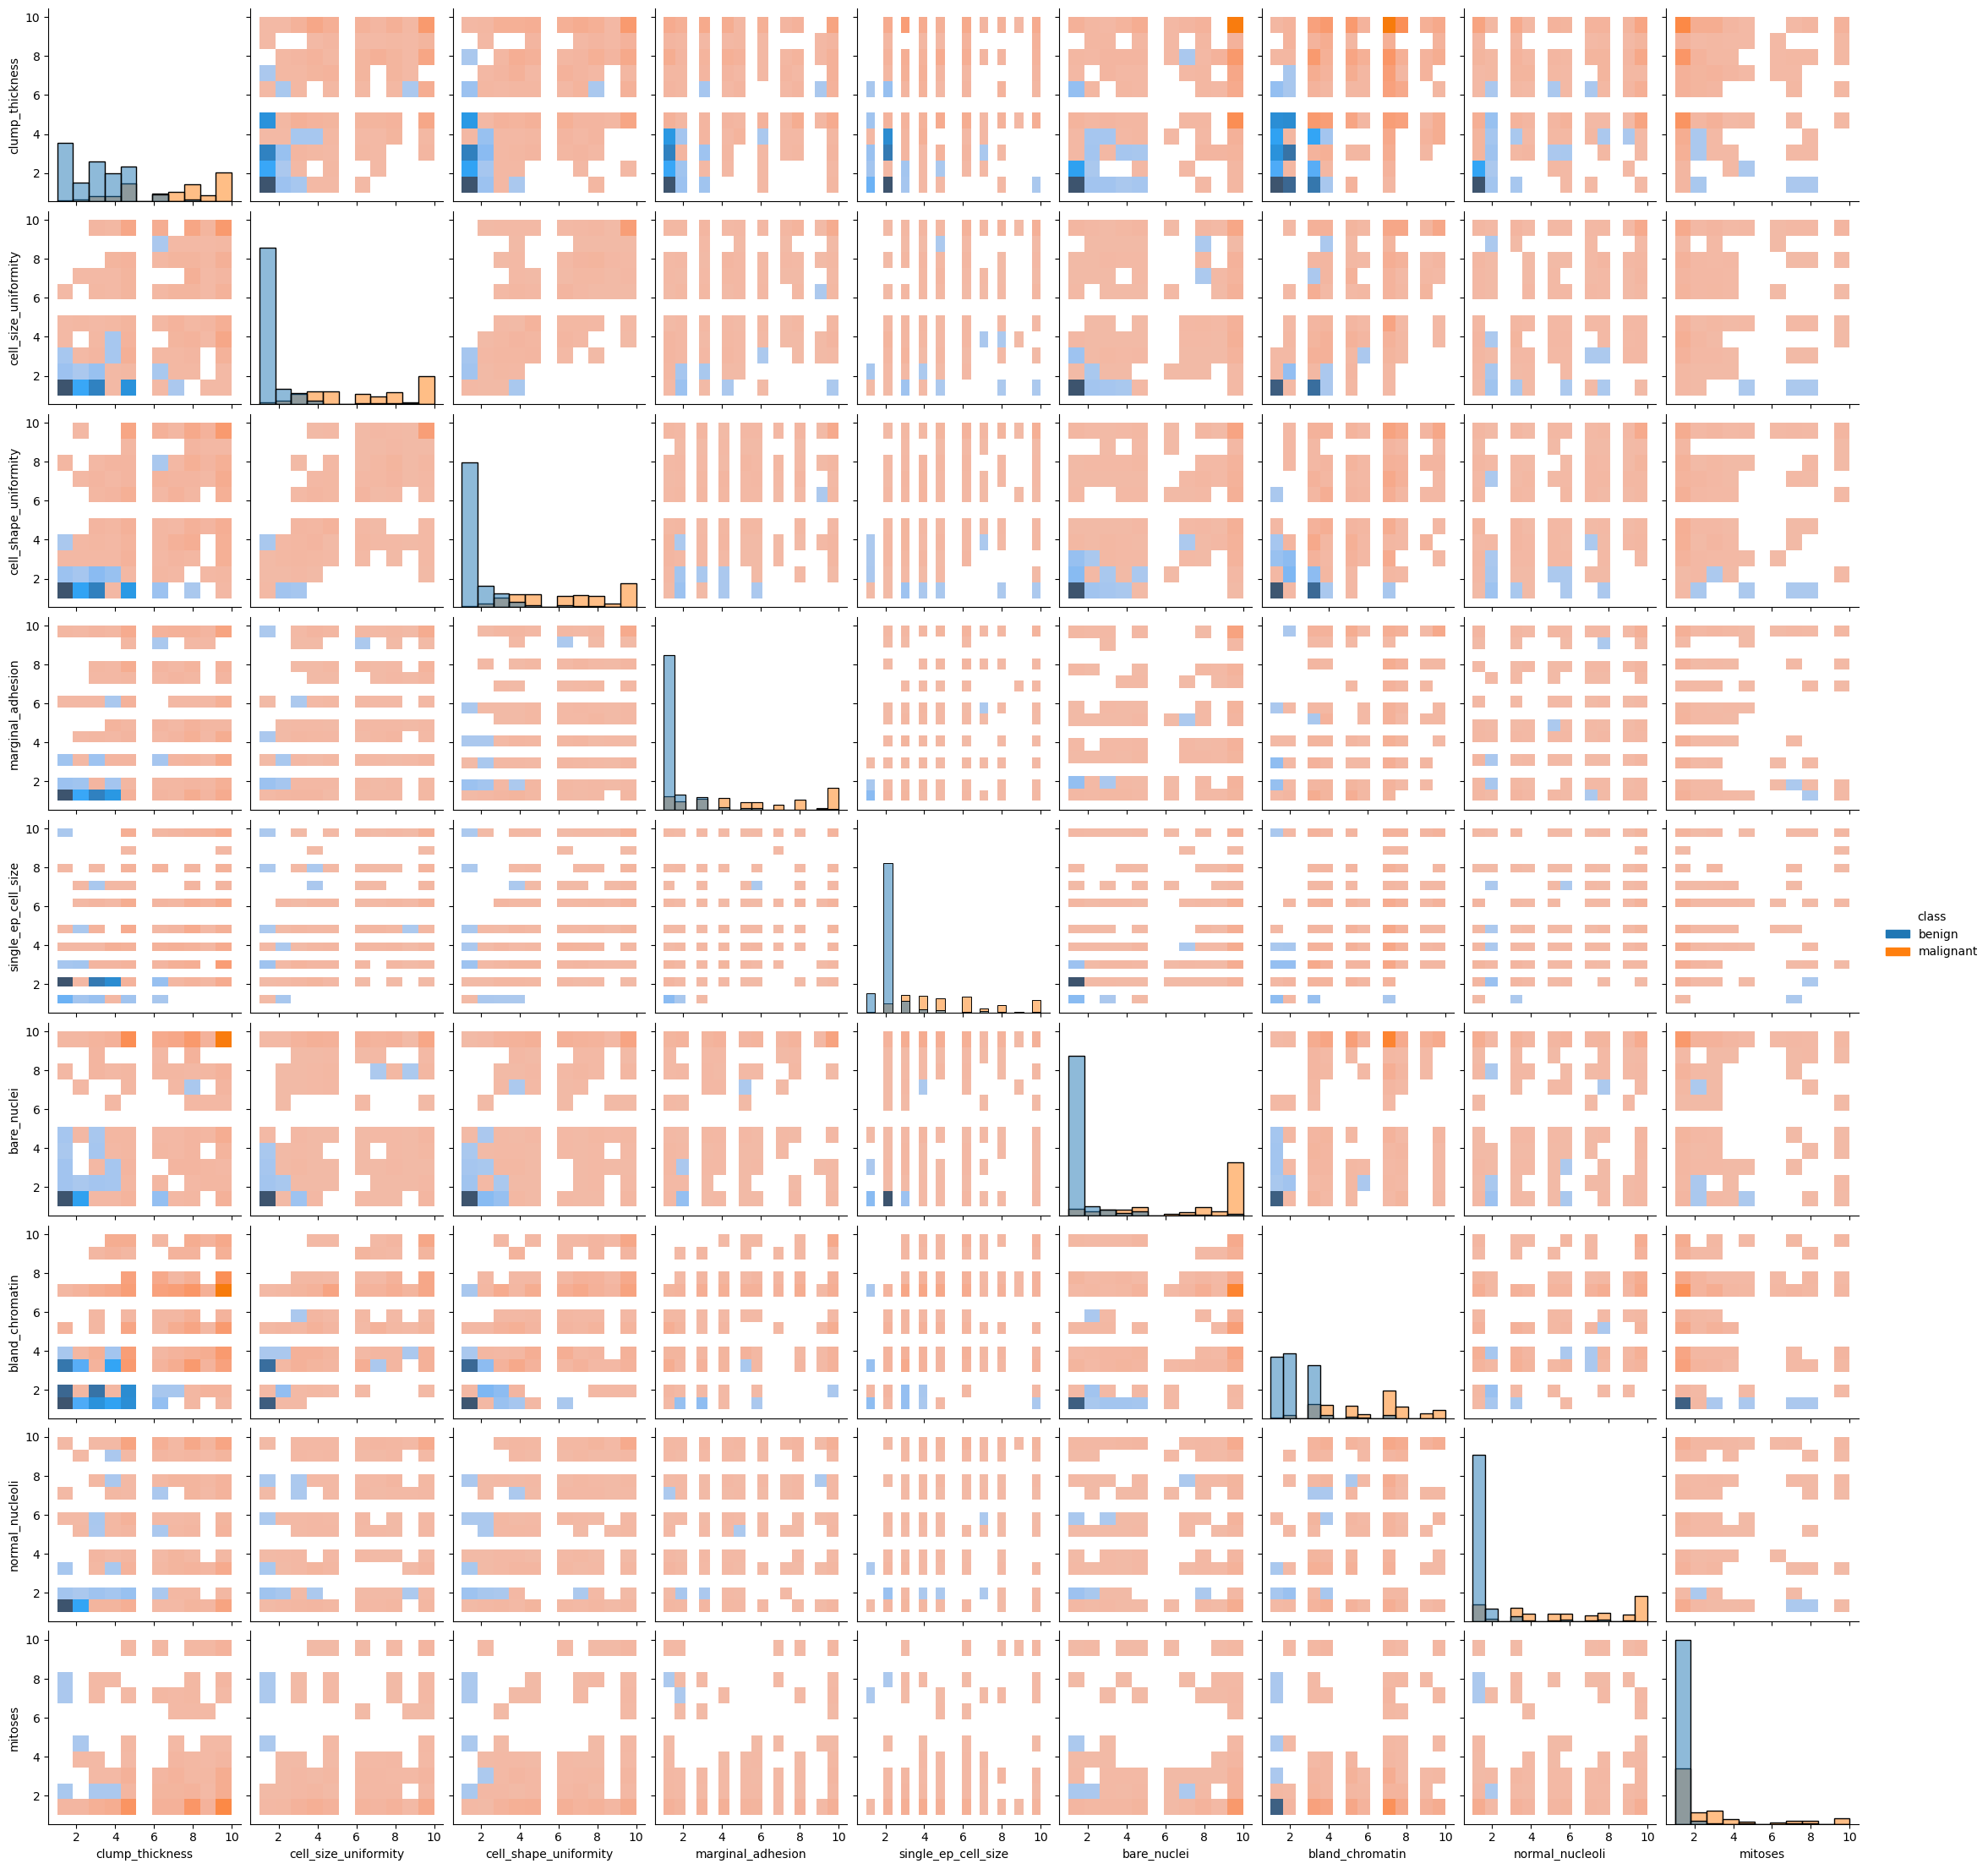

In [23]:
sns.pairplot(bcd[my_col_names], kind = 'hist', hue = 'class')

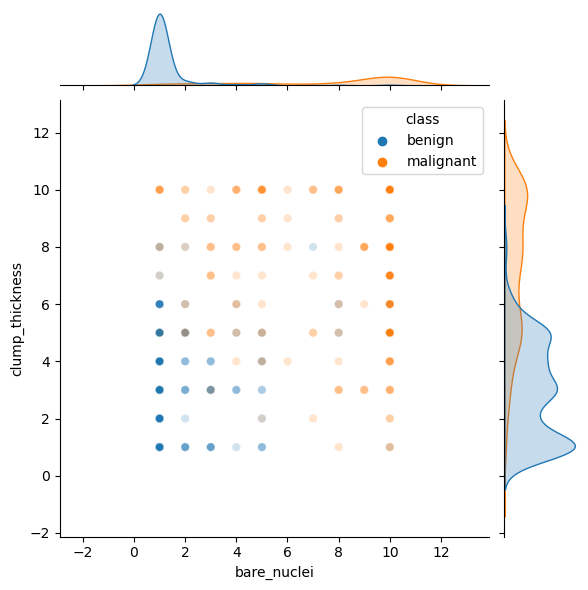

In [24]:
sns.jointplot(data=bcd, 
              x='bare_nuclei', 
              y='clump_thickness', 
              hue = 'class',
              alpha = 0.2)

### Duplicate entries

In [16]:
bcd.nunique()

patient_id               645
clump_thickness           10
cell_size_uniformity      10
cell_shape_uniformity     10
marginal_adhesion         10
single_ep_cell_size       10
bare_nuclei               10
bland_chromatin           10
normal_nucleoli           10
mitoses                    9
class                      2
doctor_name                4
dtype: int64

In [ ]:
df[df.duplicated(subset = 'patient_id', keep =False)].sort_values('patient_id')


In [ ]:
repeat_patients = df.groupby(by = 'patient_id').size().sort_values(ascending =False)

### Summaries

### Combining multiple files

In [ ]:
ls